# <font color=blue>**Pandas II - Aplicações na Vida Real - FEA.dev**</font>

Após a aula introdutória de Pandas vamos nos aprofundar mais em algumas funcionalidades da biblioteca.

# <font color=blue>Sumário</font>

- ### 1. Introdução
        
        1.1 Apresentação das bases de dados
        1.2 Loc e iloc

- ### 2. Métodos Úteis
        
        2.1 Agrupamento
        2.1.1 Groupby
        2.1.2 Pivot Table
        2.1.3 Melt
        
        2.2.1 Diff
        2.2.2 Pct_change

- ### 3. Aplicações úteis

        3.1 Cálculo de retorno
        3.2 Melhores retornos para cada fundos
        3.3 Juntando os Resultados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1. Introdução

### 1.1 Apresentação das bases de dados

In [2]:
ct = pd.read_csv("carteiras.csv", parse_dates=["data"])
at = pd.read_csv("ativos.csv", index_col=0, parse_dates=True)

In [3]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cnpj_gestor  2292 non-null   object        
 1   nome_gestor  2292 non-null   object        
 2   nome_fundo   2292 non-null   object        
 3   ativo        2292 non-null   object        
 4   ativo_desc   2292 non-null   object        
 5   data         2292 non-null   datetime64[ns]
 6   cnpj_fundo   2292 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 125.5+ KB


In [4]:
ct.describe()

C:\Users\Joel\AppData\Local\Temp\ipykernel_9208\964448758.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ct.describe()


,cnpj_gestor,nome_gestor,nome_fundo,ativo,ativo_desc,data,cnpj_fundo
count,2292,2292,2292,2292,2292,2292,2292
unique,2,2,2,236,20,13,2
top,11.180.009/0001-48,KAPITALO INVESTIMENTOS LTDA,KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO E...,ITUB4,Ações,2021-08-31 00:00:00,28.747.676/0001-62
freq,1710,1710,1710,34,1126,196,1710
first,NaN,NaN,NaN,NaN,NaN,2021-06-30 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-06-30 00:00:00,NaN


In [5]:
ct.head()

,cnpj_gestor,nome_gestor,nome_fundo,ativo,ativo_desc,data,cnpj_fundo
0,40.788.864/0001-34,TOWER THREE RV GESTORA DE RECURSOS LTDA.,T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO ...,Valores a Receber,Valores a receber,2021-06-30,41.902.620/0001-01
1,11.180.009/0001-48,KAPITALO INVESTIMENTOS LTDA,KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO E...,ECOR3,Ações e outros TVM cedidos em empréstimo,2021-06-30,28.747.676/0001-62
2,11.180.009/0001-48,KAPITALO INVESTIMENTOS LTDA,KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO E...,AERI3,Ações e outros TVM cedidos em empréstimo,2021-06-30,28.747.676/0001-62
3,11.180.009/0001-48,KAPITALO INVESTIMENTOS LTDA,KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO E...,LWSA3,Ações e outros TVM cedidos em empréstimo,2021-06-30,28.747.676/0001-62
4,11.180.009/0001-48,KAPITALO INVESTIMENTOS LTDA,KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO E...,BPAC11,Ações e outros TVM cedidos em empréstimo,2021-06-30,28.747.676/0001-62


In [6]:
at.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2021-12-31 to 2022-07-29
Columns: 131 entries, BPAC5 to ELET3
dtypes: float64(131)
memory usage: 150.6 KB


In [7]:
at.describe()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,5.0,5.0,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,98.162615,97.420112,108.039387,100.535134,90.203315,88.065950,82.746067,116.894476,100.0,100.0,...,111.922309,93.264647,88.963170,112.113664,82.983919,86.149625,94.253878,103.597014,79.402725,117.447003
std,6.537830,5.340099,8.541997,5.212278,8.161694,13.233148,14.924695,12.709496,0.0,0.0,...,6.320439,6.851411,8.996036,11.877307,11.082259,12.099884,6.340143,8.707615,15.306298,15.090912
min,83.602562,85.004600,92.677346,90.991839,72.541306,62.528290,57.393461,93.931824,100.0,100.0,...,100.000000,78.529763,69.781618,85.088919,57.971014,65.705615,83.464453,88.375154,49.584488,88.237055
25%,93.907063,93.969811,99.084668,96.968514,84.205350,79.137367,66.763342,108.366036,100.0,100.0,...,106.613819,87.079622,80.795428,100.718194,79.710145,76.138088,89.120271,97.694089,65.443213,102.903322
50%,98.281616,97.608096,110.080642,100.000000,90.415769,86.861317,89.419476,115.886290,100.0,100.0,...,111.804302,95.548780,90.144483,116.762013,84.347826,85.280728,93.581838,101.430001,81.717452,120.309458
75%,103.045018,100.137994,114.676172,103.846154,95.043273,95.732910,94.054307,126.327941,100.0,100.0,...,116.803537,100.000000,95.999394,121.779942,90.434783,94.044006,99.845254,108.886258,91.897507,131.580244
max,113.155095,110.763569,125.695817,117.435897,109.362707,118.153846,105.711610,145.818327,100.0,100.0,...,125.696744,101.219512,108.141640,134.549705,105.507246,114.719272,108.665750,122.674881,106.648199,140.872656


In [8]:
at.head()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2021-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,...,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-01-03,96.153846,99.080037,98.245614,99.487179,95.594020,95.692308,95.786517,98.639456,100.0,100.0,...,101.613068,100.0,97.089145,96.853625,98.260870,95.902883,97.111417,97.839506,94.182825,97.665370
2022-01-04,94.423077,97.884085,98.169336,98.974359,92.210858,93.846154,88.295880,99.559824,100.0,100.0,...,103.867641,100.0,96.604002,94.254446,90.144928,94.385432,93.466300,96.234568,89.196676,95.570189
2022-01-05,86.730769,94.388224,95.041953,97.179487,85.995279,86.461538,88.576779,99.799920,100.0,100.0,...,101.770364,100.0,91.510006,89.740082,85.217391,89.984825,90.990371,94.382716,81.994460,95.181084
2022-01-06,84.574684,95.676173,92.982456,95.641026,84.107002,84.923077,89.513109,102.641056,100.0,100.0,...,103.605481,100.0,91.479685,89.056088,83.768116,90.743551,89.683631,93.273261,74.792244,95.031428


In [9]:
at.tail()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2022-07-25,100.517499,95.537109,114.691627,100.249730,89.613702,75.555017,63.874883,95.708112,NaN,NaN,...,106.765198,88.046662,81.486868,116.000672,61.449275,70.561457,91.799236,96.090960,62.880886,136.756247
2022-07-26,98.573253,95.731488,113.419631,99.191685,88.301882,74.903681,60.117537,95.581234,NaN,NaN,...,106.237963,88.353659,80.625224,116.000672,61.739130,72.534143,89.287138,96.479992,60.110803,136.146409
2022-07-27,100.517499,98.161221,119.355612,103.159352,91.663421,77.509027,60.493271,95.496649,NaN,NaN,...,106.132516,88.108061,82.687014,120.153441,64.347826,75.720789,92.516978,99.203217,63.434903,138.341827
2022-07-28,100.906348,98.452789,118.719614,105.010930,95.516892,81.417045,61.432608,96.765426,NaN,NaN,...,106.765198,85.959084,85.948951,120.015015,66.376812,80.273141,91.655688,97.387734,67.313019,138.585762
2022-07-29,103.628292,97.675274,119.143613,104.746419,97.074678,79.137367,62.371944,95.073723,NaN,NaN,...,106.923369,87.125672,86.287453,116.554374,64.637681,81.031866,91.081494,96.026121,65.650970,139.683471


### Loc e iloc

In [10]:
dv = pd.read_csv("dados_devers.csv", sep=";",
                 usecols=range(4),
                 index_col=0)

In [11]:
dv.head()

,Geração,Cursos 2022,Média FEA
Devers,,,
Eddy,2.0,5,"6,9"
André,3.0,4,"8,7"
Kevyn,3.0,6,"4,9"
Thais,3.0,4,8
Bailinho,3.0,4,"1,8"


In [12]:
#buscar dados no DaraFrame pelo nome do índice
dv.loc["Eddy"]

Geração        2.0
Cursos 2022      5
Média FEA      6,9
Name: Eddy, dtype: object

In [13]:
dv.loc["Bailinho"]

,Geração,Cursos 2022,Média FEA
Devers,,,
Bailinho,3.0,4,"1,8"
Bailinho,3.0,4,"1,8"


In [14]:
dv.loc[["Eddy", "André"]]

,Geração,Cursos 2022,Média FEA
Devers,,,
Eddy,2.0,5,"6,9"
André,3.0,4,"8,7"


In [15]:
#buscar dados no DaraFrame pelo nome do índice selecionando apenas algumas colunas
dv.loc[["Eddy", "Thais"], ["Geração", "Cursos 2022"]]

,Geração,Cursos 2022
Devers,,
Eddy,2.0,5
Thais,3.0,4


In [16]:
#buscar dados no DaraFrame pelo nome do índice selecionando a partir de alguma coluna
dv.loc[["Eddy", "Thais"], "Cursos 2022":]

,Cursos 2022,Média FEA
Devers,,
Eddy,5,"6,9"
Thais,4,8


In [17]:
# indica os índices a invés dos nomes das colunas ou linhas
dv.iloc[0]

Geração        2.0
Cursos 2022      5
Média FEA      6,9
Name: Eddy, dtype: object

In [18]:
dv.iloc[0].name

'Eddy'

In [19]:
dv.iloc[range(2), range(1)]

,Geração
Devers,
Eddy,2.0
André,3.0


In [20]:
dv.iloc[[9, 5, 6]]

,Geração,Cursos 2022,Média FEA
Devers,,,
Ana Clara,3.0,6,"7,5"
Sato,3.0,5,"8,8"
Alice D.,2.0,4,"6,8"


In [21]:
del dv

In [22]:
at.head()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2021-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,...,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-01-03,96.153846,99.080037,98.245614,99.487179,95.594020,95.692308,95.786517,98.639456,100.0,100.0,...,101.613068,100.0,97.089145,96.853625,98.260870,95.902883,97.111417,97.839506,94.182825,97.665370
2022-01-04,94.423077,97.884085,98.169336,98.974359,92.210858,93.846154,88.295880,99.559824,100.0,100.0,...,103.867641,100.0,96.604002,94.254446,90.144928,94.385432,93.466300,96.234568,89.196676,95.570189
2022-01-05,86.730769,94.388224,95.041953,97.179487,85.995279,86.461538,88.576779,99.799920,100.0,100.0,...,101.770364,100.0,91.510006,89.740082,85.217391,89.984825,90.990371,94.382716,81.994460,95.181084
2022-01-06,84.574684,95.676173,92.982456,95.641026,84.107002,84.923077,89.513109,102.641056,100.0,100.0,...,103.605481,100.0,91.479685,89.056088,83.768116,90.743551,89.683631,93.273261,74.792244,95.031428


In [23]:
#buscar dados no DaraFrame a partir dessa data
at.loc["2022-01-10":, :]

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2022-01-10,83.602562,98.436063,92.677346,99.743590,81.825334,89.230769,89.325843,106.642657,NaN,NaN,...,105.807622,100.000000,86.597938,85.088919,80.869565,91.350531,87.895461,89.973205,72.576177,88.237055
2022-01-11,85.741232,97.608096,95.347063,98.717949,82.218725,95.384615,91.011236,109.203681,NaN,NaN,...,107.328148,100.000000,88.053366,87.140903,85.507246,92.109256,89.339752,91.405305,74.792244,89.314576
2022-01-12,89.629723,101.103956,96.720061,99.487179,83.241542,96.923077,90.636704,111.004402,NaN,NaN,...,107.380580,100.000000,91.631292,88.372093,85.797101,94.081942,92.847318,94.954421,77.839335,94.013768
2022-01-13,90.407421,99.540018,96.872616,97.435897,83.556255,97.230769,90.074906,109.563826,NaN,NaN,...,108.743810,100.000000,87.780473,87.277702,84.637681,93.171472,92.022008,94.020443,75.346260,94.043699
2022-01-14,92.157242,101.011960,97.101449,96.923077,85.601888,96.923077,95.599251,110.124050,NaN,NaN,...,108.796242,100.000000,93.086719,93.296854,84.057971,94.992413,90.508941,94.269504,75.900277,94.612391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,100.517499,95.537109,114.691627,100.249730,89.613702,75.555017,63.874883,95.708112,NaN,NaN,...,106.765198,88.046662,81.486868,116.000672,61.449275,70.561457,91.799236,96.090960,62.880886,136.756247
2022-07-26,98.573253,95.731488,113.419631,99.191685,88.301882,74.903681,60.117537,95.581234,NaN,NaN,...,106.237963,88.353659,80.625224,116.000672,61.739130,72.534143,89.287138,96.479992,60.110803,136.146409
2022-07-27,100.517499,98.161221,119.355612,103.159352,91.663421,77.509027,60.493271,95.496649,NaN,NaN,...,106.132516,88.108061,82.687014,120.153441,64.347826,75.720789,92.516978,99.203217,63.434903,138.341827


### Retorno a apresentação das bases

In [24]:
# unique - quando utilizado em series, retorna um array do numpy, dropando os duplicados
#drop_duplicates - para Data Frames
ct['ativo'].unique()

array(['Valores a Receber', 'ECOR3', 'AERI3', 'LWSA3', 'BPAC11', 'ITUB4',
       'LREN3', 'PETR3', 'PETR4', 'BRDT3', 'BPAC5', 'RAPT4', 'CMIG4',
       'MELK3', 'DIRR3', 'PLPL3', 'BPAN4', 'BRAP4', 'HAPV3', 'AZUL4',
       'CMIG3', 'AESB3', 'FUTWINQ21', 'FUTWDOQ21', 'FUTDOLN21',
       'Investimento no Exterior', 'Disponibilidade', 'AZUL11',
       '27.635.189/0001-45', '34.964.555/0001-75', 'BRKM5', 'SULA11',
       'AURA33', 'BRFS3', 'CSNA3', 'HYPE3', 'CRFB3', 'RADL3', 'BTOW3',
       'CVCB1', 'MYPK3', 'RECV3', 'IFCM3', 'WEST3', 'BBAS3', 'TIMS3',
       'EMBR3', 'GMAT3', 'RRRP3', 'GOAU4', 'SUZB3', 'FUTWDON21', 'LAME4',
       'MRFG3', 'TGMA3', 'SOMA3', 'BBDC3', 'JSLG3', 'SBFG3', 'PNVL3',
       'LAME3', 'ESPA3', 'LIGT3', 'RAIL3', 'GNDI3', 'BBDC4', 'GOAU3',
       'PARD3', 'FUTDOLQ21', 'Valores a Pagar - Posição Vendida de CRFB3',
       'VVAR3', 'MULT3', 'ALSO3', 'MOVI3', 'GGBR4', 'MDIA3', 'EQTL3',
       'INTB3', 'BRAP3', 'ASAI3',
       'Valores a Pagar - Posição Vendida de NEOE3', '

In [25]:
ct['ativo'].unique()[0]

'Valores a Receber'

In [26]:
#compara número de ativo no DataFrame ct com o número de colunas no DataFrame at
print(len(ct["ativo"].unique()), "vs", len(at.columns))
print(ct["ativo"].unique()[0])

236 vs 131
Valores a Receber


#### Set Theory
![set_theory](set_theory.png)
![set_theory_ativos](set_theory_ativos.png)

In [27]:
# Sets - link para métodos de set: https://www.w3schools.com/python/python_ref_set.asp
x = {'Petrobras', 'Itaú', 'Suzano'}
y = {'Eletrobras', 'Bradesco', 'Suzano'}

#Subtrai os elementos de y em x
z = x.difference(y)
z

{'Itaú', 'Petrobras'}

In [28]:
y.difference(x)

{'Bradesco', 'Eletrobras'}

In [29]:
#dierença simétrica - pega tudo fora da intersecção
x.symmetric_difference(y)

{'Bradesco', 'Eletrobras', 'Itaú', 'Petrobras'}

In [30]:
x.intersection(y)

{'Suzano'}

In [31]:
# acessar colunas do dataframe de ativos
at.columns

Index(['BPAC5', 'RAPT4', 'CMIG4', 'MELK3', 'DIRR3', 'PLPL3', 'BPAN4', 'BRAP4',
       '27.635.189/0001-45', '34.964.555/0001-75',
       ...
       'ITUB3', 'AURE3', 'WEGE3', 'BRPR3', 'HBSA3', 'EVEN3', 'UGPA3', 'NEOE3',
       'TCSA3', 'ELET3'],
      dtype='object', length=131)

In [32]:
#tudo que tenho nas colunas, tenho nos ativos também, então dá vazio
set(at.columns.unique()).difference(ct["ativo"].unique())

set()

In [33]:
# por outro lado, há ativos nas carteiras que não estão no DataFrame
set(ct["ativo"].unique()).difference(at.columns.unique())

{'ABEVT172',
 'ABEVU162',
 'ALUP11',
 'AMER1',
 'AMER9',
 'AURA33',
 'AZUL11',
 'BOVA11',
 'BPAC11',
 'CVCB1',
 'Disponibilidade',
 'FUTDI1F23',
 'FUTDI1F24',
 'FUTDOLF22',
 'FUTDOLG22',
 'FUTDOLH22',
 'FUTDOLJ22',
 'FUTDOLK22',
 'FUTDOLM22',
 'FUTDOLN21',
 'FUTDOLN22',
 'FUTDOLQ21',
 'FUTDOLQ22',
 'FUTDOLU21',
 'FUTDOLV21',
 'FUTDOLX21',
 'FUTDOLZ21',
 'FUTINDG22',
 'FUTINDJ22',
 'FUTINDM22',
 'FUTINDQ21',
 'FUTINDQ22',
 'FUTINDV21',
 'FUTINDZ21',
 'FUTWDOF22',
 'FUTWDOG22',
 'FUTWDOH22',
 'FUTWDOJ22',
 'FUTWDOK22',
 'FUTWDOM22',
 'FUTWDON21',
 'FUTWDON22',
 'FUTWDOQ21',
 'FUTWDOQ22',
 'FUTWDOU21',
 'FUTWDOV21',
 'FUTWDOX21',
 'FUTWDOZ21',
 'FUTWING22',
 'FUTWINJ22',
 'FUTWINM22',
 'FUTWINQ21',
 'FUTWINQ22',
 'FUTWINV21',
 'FUTWINZ21',
 'IBOVJ120',
 'IBOVK115',
 'IBOVL122',
 'IBOVL2',
 'IGTI11',
 'Investimento no Exterior',
 'KLBN11',
 'LTN_03072020_01102022',
 'LTN_05012018_01012022',
 'LTN_21062018_01072022',
 'MELI34',
 'MGLUT220',
 'NTNB_07032006_15052035',
 'NTNB_10012018_1508202

In [34]:
ct.loc[ct["ativo"].isin(at.columns), ["ativo", "ativo_desc"]].drop_duplicates()

,ativo,ativo_desc
1,ECOR3,Ações e outros TVM cedidos em empréstimo
2,AERI3,Ações e outros TVM cedidos em empréstimo
3,LWSA3,Ações e outros TVM cedidos em empréstimo
5,ITUB4,Ações e outros TVM cedidos em empréstimo
6,LREN3,Ações e outros TVM cedidos em empréstimo
...,...,...
1799,TCSA3,Ações
1932,HBSA3,Obrigações por ações e outros TVM recebidos em...
2141,MRFG3,Ações e outros TVM cedidos em empréstimo
2241,ELET3,Ações


In [35]:
ct.loc[ct["ativo"].isin(at.columns), "ativo_desc"].unique()

array(['Ações e outros TVM cedidos em empréstimo', 'Ações',
       'Cotas de Fundos',
       'Obrigações por ações e outros TVM recebidos em empréstimo'],
      dtype=object)

In [36]:
pd.set_option('max_colwidth', None)
ct[["nome_gestor", "nome_fundo"]].drop_duplicates().reset_index(drop=True)

,nome_gestor,nome_fundo
0,TOWER THREE RV GESTORA DE RECURSOS LTDA.,T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED
1,KAPITALO INVESTIMENTOS LTDA,KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES


In [37]:
pd.reset_option('^display.', silent=True)

## 2. Métodos Úteis

### 2.1.1 Groupby
Função de agregação: agrupo por certa coisa e tenta tirar um insight a partir disso (soma, média, etc.).

In [38]:
# nunique é a função agregadora aqui (count de valores únicos), mas poderia ser outra, como sum,  count, etc.
ct.groupby("nome_fundo").nunique()[["ativo"]]

,ativo
nome_fundo,
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,176
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,135


In [39]:
ct[["nome_fundo", "data", "ativo"]].groupby(["nome_fundo", "data"]).count()

ativo
nome_fundo                                         data             
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM... 2021-06-30    133
                                                   2021-07-30    140
                                                   2021-08-31    144
                                                   2021-09-30    126
                                                   2021-10-29    127
                                                   2021-11-30    125
                                                   2021-12-31    121
                                                   2022-01-31    123
                                                   2022-02-25    140
                                                   2022-03-31    121
                                                   2022-04-29    138
                                                   2022-05-31    135
                                                   2022-06-30    137
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO P... 2021-06-30     40
                                                   2021-07-30     43
                                                   2021-08-31     52
                                                   2021-09-30     53
                                                   2021-10-29     53
                                                   2021-11-30     49
                                                   2021-12-31     46
                                                   2022-01-31     41
                                                   2022-02-25     38
                                                   2022-03-31     46
                                                   2022-04-29     43
                                                   2022-05-31     36
                                                   2022-06-30     42

### 2.1.2 Pivot Table
Mesmo esquema do groupby. Tabela formato wide.

In [40]:
#lambda define a função na hora
ct.pivot_table("ativo_desc", index="nome_fundo", columns="data", aggfunc=lambda x: len(x.unique()))

data,2021-06-30,2021-07-30,2021-08-31,2021-09-30,2021-10-29,2021-11-30,2021-12-31,2022-01-31,2022-02-25,2022-03-31,2022-04-29,2022-05-31,2022-06-30
nome_fundo,,,,,,,,,,,,,
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,16,16,16,16,15,15,14,14,14,16,15,14,14
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,8,9,13,14,13,13,13,12,13,13,12,11,11


In [41]:
ct.pivot_table("ativo", index="nome_fundo", columns="data", aggfunc=lambda x: len(x.unique()))

data,2021-06-30,2021-07-30,2021-08-31,2021-09-30,2021-10-29,2021-11-30,2021-12-31,2022-01-31,2022-02-25,2022-03-31,2022-04-29,2022-05-31,2022-06-30
nome_fundo,,,,,,,,,,,,,
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,107,106,103,97,94,93,93,95,95,97,96,95,95
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,40,42,50,51,51,48,44,40,37,44,43,36,42


In [42]:
# É tipo uma tabela dinâmica
pivoted_table = ct.pivot_table("ativo", index="nome_fundo", columns="data", aggfunc="count")
pivoted_table

data,2021-06-30,2021-07-30,2021-08-31,2021-09-30,2021-10-29,2021-11-30,2021-12-31,2022-01-31,2022-02-25,2022-03-31,2022-04-29,2022-05-31,2022-06-30
nome_fundo,,,,,,,,,,,,,
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,133,140,144,126,127,125,121,123,140,121,138,135,137
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,40,43,52,53,53,49,46,41,38,46,43,36,42


### 2.1.3 Melt
Tabela formato long.

In [43]:
pivoted_table.melt(ignore_index=False).head(6)

,data,value
nome_fundo,,
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,2021-06-30,133
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,2021-06-30,40
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,2021-07-30,140
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,2021-07-30,43
KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES,2021-08-31,144
T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED,2021-08-31,52


### 2.2.1 Diff
Diff é fazer a subtração de um valor pelo anterior (variação absoluta)

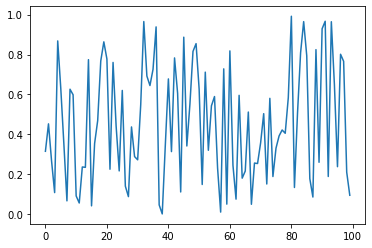

In [44]:
#plota série de números randômicos com reta estacionária
np.random.seed(420)
rand_series = np.random.rand(100)
plt.plot(np.arange(100), rand_series)

In [45]:
# cria uma linha de tendência
x = np.arange(100).reshape(-1, 1)
y_tendencia = (rand_series * np.arange(1, 20, .19)).reshape(-1, 1)
pred = LinearRegression().fit(x, y_tendencia).predict(x)

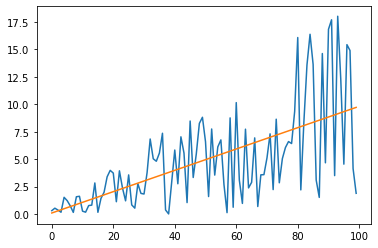

In [46]:
fix, ax = plt.subplots()
ax.plot(x, y_tendencia)
ax.plot(pred)
plt.show()

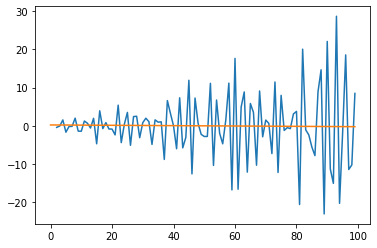

In [47]:
#(t1 - t0) --> tende a tirar a tendência da nossa série
y = pd.Series(y_tendencia.flatten()).diff()
pred = LinearRegression().fit(x, y.fillna(0)).predict(x)

fig, ax = plt.subplots()

# função plot do pandas
y.diff().plot()
ax.plot(pred)
plt.show()

### 2.2.2 Pct_change
Retorno diário
(x1 - x0)/x0 (diferença relativa)

In [48]:
#shiift joga o dataframe para frente
((at - at.shift(1)) / at).head()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.040000,-0.009285,-0.017857,-0.005155,-0.046091,-0.045016,-0.043988,-0.013793,0.0,0.0,...,0.015875,0.0,-0.029981,-0.032486,-0.017699,-0.042722,-0.029745,-0.022082,-0.061765,-0.023904
2022-01-04,-0.018330,-0.012218,-0.000777,-0.005181,-0.036689,-0.019672,-0.084836,0.009244,0.0,0.0,...,0.021706,0.0,-0.005022,-0.027576,-0.090032,-0.016077,-0.038999,-0.016677,-0.055901,-0.021923
2022-01-05,-0.088692,-0.037037,-0.032905,-0.018470,-0.072278,-0.085409,0.003171,0.002406,0.0,0.0,...,-0.020608,0.0,-0.055666,-0.050305,-0.057823,-0.048904,-0.027211,-0.019621,-0.087838,-0.004088
2022-01-06,-0.025493,0.013462,-0.022149,-0.016086,-0.022451,-0.018116,0.010460,0.027680,0.0,0.0,...,0.017713,0.0,-0.000331,-0.007680,-0.017301,0.008361,-0.014571,-0.011895,-0.096296,-0.001575


In [49]:
#mesma coisa, de outra forma
(at.diff() / at).head()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.040000,-0.009285,-0.017857,-0.005155,-0.046091,-0.045016,-0.043988,-0.013793,0.0,0.0,...,0.015875,0.0,-0.029981,-0.032486,-0.017699,-0.042722,-0.029745,-0.022082,-0.061765,-0.023904
2022-01-04,-0.018330,-0.012218,-0.000777,-0.005181,-0.036689,-0.019672,-0.084836,0.009244,0.0,0.0,...,0.021706,0.0,-0.005022,-0.027576,-0.090032,-0.016077,-0.038999,-0.016677,-0.055901,-0.021923
2022-01-05,-0.088692,-0.037037,-0.032905,-0.018470,-0.072278,-0.085409,0.003171,0.002406,0.0,0.0,...,-0.020608,0.0,-0.055666,-0.050305,-0.057823,-0.048904,-0.027211,-0.019621,-0.087838,-0.004088
2022-01-06,-0.025493,0.013462,-0.022149,-0.016086,-0.022451,-0.018116,0.010460,0.027680,0.0,0.0,...,0.017713,0.0,-0.000331,-0.007680,-0.017301,0.008361,-0.014571,-0.011895,-0.096296,-0.001575


In [50]:
#mesma coisa, de outra forma mais simples
at.pct_change().head()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.038462,-0.009200,-0.017544,-0.005128,-0.044060,-0.043077,-0.042135,-0.013605,0.0,0.0,...,0.016131,0.0,-0.029109,-0.031464,-0.017391,-0.040971,-0.028886,-0.021605,-0.058172,-0.023346
2022-01-04,-0.018000,-0.012071,-0.000776,-0.005155,-0.035391,-0.019293,-0.078201,0.009331,0.0,0.0,...,0.022188,0.0,-0.004997,-0.026836,-0.082596,-0.015823,-0.037535,-0.016404,-0.052941,-0.021453
2022-01-05,-0.081466,-0.035714,-0.031857,-0.018135,-0.067406,-0.078689,0.003181,0.002412,0.0,0.0,...,-0.020192,0.0,-0.052731,-0.047896,-0.054662,-0.046624,-0.026490,-0.019243,-0.080745,-0.004071
2022-01-06,-0.024860,0.013645,-0.021669,-0.015831,-0.021958,-0.017794,0.010571,0.028468,0.0,0.0,...,0.018032,0.0,-0.000331,-0.007622,-0.017007,0.008432,-0.014361,-0.011755,-0.087838,-0.001572


In [51]:
#sendo uma diferença, a primeira linha não terá variação pois é a base para os demais cálculos. 
#Então, há diferentes formas de lidar com isso.

#Uma delas, é simplesmente ignorando essa primeira linha
at.pct_change().iloc[1:]

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2022-01-03,-0.038462,-0.009200,-0.017544,-0.005128,-0.044060,-0.043077,-0.042135,-0.013605,0.0,0.0,...,0.016131,0.000000,-0.029109,-0.031464,-0.017391,-0.040971,-0.028886,-0.021605,-0.058172,-0.023346
2022-01-04,-0.018000,-0.012071,-0.000776,-0.005155,-0.035391,-0.019293,-0.078201,0.009331,0.0,0.0,...,0.022188,0.000000,-0.004997,-0.026836,-0.082596,-0.015823,-0.037535,-0.016404,-0.052941,-0.021453
2022-01-05,-0.081466,-0.035714,-0.031857,-0.018135,-0.067406,-0.078689,0.003181,0.002412,0.0,0.0,...,-0.020192,0.000000,-0.052731,-0.047896,-0.054662,-0.046624,-0.026490,-0.019243,-0.080745,-0.004071
2022-01-06,-0.024860,0.013645,-0.021669,-0.015831,-0.021958,-0.017794,0.010571,0.028468,0.0,0.0,...,0.018032,0.000000,-0.000331,-0.007622,-0.017007,0.008432,-0.014361,-0.011755,-0.087838,-0.001572
2022-01-07,0.000000,0.056731,0.005742,-0.008043,-0.004677,0.101449,0.009414,0.039376,0.0,0.0,...,0.015688,0.000000,-0.025191,-0.009217,0.006920,-0.001672,-0.006902,-0.019359,0.022222,-0.043780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.013359,0.010277,0.015962,0.010667,-0.038698,-0.068273,-0.039548,0.013435,0.0,0.0,...,0.013514,-0.011716,0.030027,-0.002381,0.019231,-0.016913,0.026485,0.031315,-0.034043,0.004929
2022-07-26,-0.019342,0.002035,-0.011091,-0.010554,-0.014639,-0.008621,-0.058824,-0.001326,0.0,0.0,...,-0.004938,0.003487,-0.010574,0.000000,0.004717,0.027957,-0.027365,0.004049,-0.044053,-0.004459
2022-07-27,0.019724,0.025381,0.052336,0.040000,0.038069,0.034783,0.006250,-0.000885,0.0,0.0,...,-0.000993,-0.002780,0.025573,0.035800,0.042254,0.043933,0.036174,0.028226,0.055300,0.016125


In [52]:
#Ou você pode preencher a linha com algum valor que deseje, como 0 (melhor do que ignorar).
filling_first = at.pct_change()
filling_first.iloc[0] = 0
filling_first.head()

,BPAC5,RAPT4,CMIG4,MELK3,DIRR3,PLPL3,BPAN4,BRAP4,27.635.189/0001-45,34.964.555/0001-75,...,ITUB3,AURE3,WEGE3,BRPR3,HBSA3,EVEN3,UGPA3,NEOE3,TCSA3,ELET3
data,,,,,,,,,,,,,,,,,,,,,
2021-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-03,-0.038462,-0.009200,-0.017544,-0.005128,-0.044060,-0.043077,-0.042135,-0.013605,0.0,0.0,...,0.016131,0.0,-0.029109,-0.031464,-0.017391,-0.040971,-0.028886,-0.021605,-0.058172,-0.023346
2022-01-04,-0.018000,-0.012071,-0.000776,-0.005155,-0.035391,-0.019293,-0.078201,0.009331,0.0,0.0,...,0.022188,0.0,-0.004997,-0.026836,-0.082596,-0.015823,-0.037535,-0.016404,-0.052941,-0.021453
2022-01-05,-0.081466,-0.035714,-0.031857,-0.018135,-0.067406,-0.078689,0.003181,0.002412,0.0,0.0,...,-0.020192,0.0,-0.052731,-0.047896,-0.054662,-0.046624,-0.026490,-0.019243,-0.080745,-0.004071
2022-01-06,-0.024860,0.013645,-0.021669,-0.015831,-0.021958,-0.017794,0.010571,0.028468,0.0,0.0,...,0.018032,0.0,-0.000331,-0.007622,-0.017007,0.008432,-0.014361,-0.011755,-0.087838,-0.001572


## 3. Aplicações Úteis

### 3.1 Cálculo de Retorno

In [53]:
#top 5 ações com maiores retornos a partir dos retornos diários, somando a 1 para não obter zero.
((at.pct_change() + 1).prod() - 1).sort_values(ascending=False)[:5]

HYPE3    0.530917
ELET6    0.490324
PETR4    0.463378
PETR3    0.444781
ELET3    0.396835
dtype: float64

In [54]:
((at.pct_change() + 1).prod() - 1)[:3]

BPAC5    0.036283
RAPT4   -0.023247
CMIG4    0.191436
dtype: float64

<AxesSubplot:xlabel='data'>

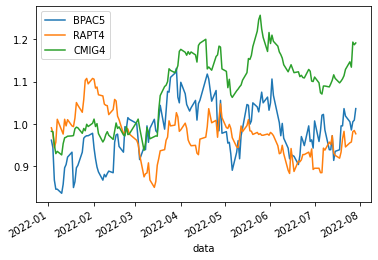

In [63]:
(at.pct_change() + 1).cumprod().iloc[:, :3].plot()

In [55]:
top_10_geral = ((at.pct_change() + 1).prod() - 1).sort_values(ascending=False)[:10]

### 3.2 Cálculo Para Cada Fundo

In [56]:
ativos_tarkus = (ct.loc[ct["ativo"].isin(at.columns) &
                        (ct["nome_fundo"]=="KAPITALO TARKUS MÁSTER FUNDO DE INVESTIMENTO EM AÇÕES"),
                        "ativo"]
                   .unique()
)
ativos_t3 = (ct["ativo"][ct["ativo"].isin(at.columns) &
                         (ct["nome_fundo"]=="T3 FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO LONG BIASED")]
                   .unique()
)

In [57]:
top_10_tarkus = ((at[ativos_tarkus].pct_change() + 1).prod() - 1).sort_values(ascending=False)[:10]
top_10_t3 = ((at[ativos_t3].pct_change() + 1).prod() - 1).sort_values(ascending=False)[:10]

### 3.3 Juntando os Resultados

In [58]:
#concatenar listas
pd.concat([top_10_geral.rename("Geral"),
           top_10_tarkus.rename("Kapitalo Tarkus"),
           top_10_t3.rename("Tower Three Long Biased")], axis=1)

,Geral,Kapitalo Tarkus,Tower Three Long Biased
HYPE3,0.530917,0.530917,0.530917
ELET6,0.490324,0.490324,0.490324
PETR4,0.463378,0.463378,0.463378
PETR3,0.444781,0.444781,0.444781
ELET3,0.396835,0.396835,0.396835
MDIA3,0.322150,NaN,0.322150
RECV3,0.320227,0.320227,0.320227
BBAS3,0.316901,0.316901,0.316901
MULT3,0.285482,NaN,0.285482
CMIG3,0.254412,0.254412,NaN


![](joins.png)

In [64]:
#merge só pode ser usado com Dataframe, não com séries. Outer = full join
(pd.DataFrame(top_10_geral.rename("Geral"))
   .merge(top_10_tarkus.rename("Tarkus"),
          left_index=True,
          right_index=True,
          how="outer")
   .merge(top_10_t3.rename("Tower Three Long Biased"),
          left_index=True,
          right_index=True,
          how="outer")
).sort_values("Geral", ascending=False)

,Geral,Tarkus,Tower Three Long Biased
HYPE3,0.530917,0.530917,0.530917
ELET6,0.490324,0.490324,0.490324
PETR4,0.463378,0.463378,0.463378
PETR3,0.444781,0.444781,0.444781
ELET3,0.396835,0.396835,0.396835
MDIA3,0.322150,NaN,0.322150
RECV3,0.320227,0.320227,0.320227
BBAS3,0.316901,0.316901,0.316901
MULT3,0.285482,NaN,0.285482
CMIG3,0.254412,0.254412,NaN


In [60]:
(pd.DataFrame(top_10_geral.rename("Geral"))
   .join(top_10_tarkus.rename("Tarkus"),
          how="outer")
   .join(top_10_t3.rename("Tower Three Long Biased"),
          how="outer")
).sort_values("Geral", ascending=False)

,Geral,Tarkus,Tower Three Long Biased
HYPE3,0.530917,0.530917,0.530917
ELET6,0.490324,0.490324,0.490324
PETR4,0.463378,0.463378,0.463378
PETR3,0.444781,0.444781,0.444781
ELET3,0.396835,0.396835,0.396835
MDIA3,0.322150,NaN,0.322150
RECV3,0.320227,0.320227,0.320227
BBAS3,0.316901,0.316901,0.316901
MULT3,0.285482,NaN,0.285482
CMIG3,0.254412,0.254412,NaN


#### **Bônus:** Vídeo sobre cálculo de retornos FEA.dev

https://www.youtube.com/watch?v=8FjerLRybkg&t=5s